In [ ]:
import pandas as pd
import numpy as np

In [ ]:
mush_train = pd.read_csv("mush_train.data", header = None)
mush_train = mush_train.to_numpy()

mush_test = pd.read_csv("mush_test.data", header = None)
mush_test = mush_test.to_numpy()

In [ ]:
X_train = mush_train[:,1:]
Y_train = mush_train[:,0]

X_test = mush_test[:,1:]
Y_test = mush_test[:,0]

In [ ]:
# Constructing decision tree

class Node():

  def __init__(self,X,Y, parent,isInternal =True, branched_at=None):
    self.X = X
    self.Y = Y
    self.parent = parent
    self.isInternal = isInternal
    self.child = []
    self.IG = 0
    self.branched_at = branched_at

    if(len(set(Y)) == 1):
      self.leaf = True
      self.label = Y[0]
    else:
      self.leaf = False
      self.label = 'not a leaf'
    if((parent == None or isInternal) and (not self.leaf)):
      self.branch()


  def cond_entropy(self,xi):
    H_YXi = 0
    for cat in set(self.X[:,xi]): #pick the column representing the attribute 'xi'
      Y_cat = self.Y[np.where(self.X[:,xi] == cat)] # count of Y given each discrete value of xi
      e = len(np.where(Y_cat == 'e')[0]) / Y_cat.shape[0] # p(Y='e')
      p = len(np.where(Y_cat == 'p')[0]) / Y_cat.shape[0] # p(Y='p')
      H_YXi -= (Y_cat.shape[0] / self.Y.shape[0]) * (np.log(e**e) + np.log(p**p)) # H(Y|X)

    return H_YXi

  def branch(self):
    e = len(np.where(self.Y == 'e')[0]) / self.Y.shape[0] #p(Y='e')
    p = len(np.where(self.Y == 'p')[0]) / self.Y.shape[0] #p(Y='p')
    H_Y = -(np.log(e**e) + np.log(p**p))

    if(self.branched_at == None):
      max_gain = 0

      for xi in range(self.X.shape[1]):
        H_Yxi = self.cond_entropy(xi)
        IG = H_Y - H_Yxi
        if (IG > max_gain) or (IG == max_gain and self.branched_at < xi): #break ties
          max_gain = IG
          self.branched_at = xi
    
    else:
      max_gain = H_Y = self.cond_entropy(self.branched_at)

    self.IG = max_gain
    self.label = 'IG= ' + str(np.round(max_gain,3)) + '\n at' + str(self.branched_at)

    for cat in set(self.X[:, self.branched_at]):
      X_c = self.X[np.where(self.X[:,self.branched_at] == cat)[0], :]
      Y_c = self.Y[np.where(self.X[:,self.branched_at] == cat)[0]]
      new_node = Node(X_c,Y_c,self)
      self.child.append(new_node)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
def plot_tree(main_node, index, dim):

  def dfs(mnode, pre_index):
    for node in mnode.child:
      index = node.label
      if(index in {'e','p'}):
        index = str(mnode.branched_at) + node.X[0, mnode.branched_at] + ' -> ' + index
      else:
        index = str(mnode.branched_at) + node.X[0, mnode.branched_at] + '\n' + index

      Graph.add_node(index)
      Graph.add_edge(pre_index, index)
      dfs(node, index)

  Graph = nx.DiGraph()
  Graph.add_node(main_node.label)
  dfs(main_node,index)
  pos = graphviz_layout(Graph, prog='dot')
  plt.figure(figsize=dim)
  nx.draw(Graph,pos,with_labels=True,font_weight='bold',node_color='skyblue',alpha=1,node_size=1600)
  plt.show()

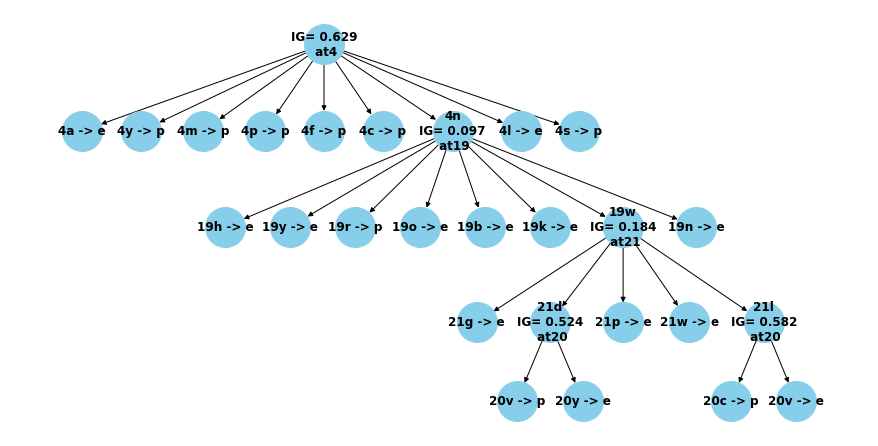

In [ ]:
main_node = Node(X_train,Y_train,None)

plot_tree(main_node, main_node.label, [12,6])

In [ ]:
def predict(X,main_node):
  Y_pred = []

  for i in range(X.shape[0]):
    cur_node = main_node

    while True:
      if(cur_node.label in set(Y_train)):
        Y_pred.append(cur_node.label)
        break
      else:
        flag = 0
        for node in cur_node.child:
          check = list(set(node.X[:,cur_node.branched_at]))[0]
          if(X[i,cur_node.branched_at] == check):
            cur_node = node
            flag = 1
            break
        if(flag == 0):
            Y_pred.append('Not found')
            break

  return Y_pred

In [ ]:
print(predict(X_test[:10,:],main_node))

['p', 'p', 'p', 'e', 'p', 'p', 'p', 'e', 'p', 'e']


In [ ]:
(predict(X_test,main_node) == Y_test).mean()

1.0

In [ ]:
X_train

array([['f', 'f', 'n', ..., 'n', 'y', 'd'],
       ['x', 'y', 'y', ..., 'n', 'y', 'p'],
       ['x', 'y', 'n', ..., 'k', 's', 'g'],
       ...,
       ['f', 'f', 'n', ..., 'k', 's', 'g'],
       ['x', 'f', 'y', ..., 'h', 'y', 'g'],
       ['x', 'f', 'g', ..., 'n', 'v', 'd']], dtype=object)

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for i in range(len(X_train)-2):
  le.fit(X_train[:,i])


IndexError: ignored

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, X_test)

ValueError: ignored